In [1]:
import matplotlib.pyplot as plt
import os
from ast import literal_eval as liteval
import math as m
import file_utils

plt.rc('text', usetex=True)

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

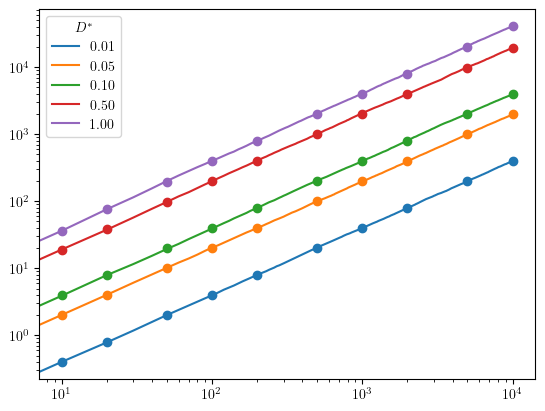

In [26]:
# Comparison between MSD calculations using MSD.cpp with LAMMPS output from 5 datasets

fig, ax = plt.subplots()

# Plotting LAMMPS output MSD data
dt = 5e-5
frameW = 2e5

dirpath = "//media/ashwin/One Touch/ashwin_md/Nov2024/msd_benchmarks"
imgpath = "/home/ashwin/Desktop/ashwin_md/LD/LD-cpp/imgs/Mar2025"
contents = os.listdir(dirpath)

files = []
for fname in contents:
    if(fname.find("lmp_D_") >= 0):
        files.append(fname)

for i in range(len(files)):
    fpath = os.path.join(dirpath, files[i], "msd.dat")
    [[frame, msd], _] = file_utils.readData(fpath, 1)
    
    time = [j*dt*frameW for j in frame]
    ax.loglog(time, msd, label = r"${d}$".format(d = files[i].removeprefix("lmp_D_")))

    fpath = os.path.join(dirpath, files[i], "msd_cpp.dat")
    [[step, msd], _] = file_utils.readData(fpath, 1)
    
    time = [j*dt for j in step]
    ax.loglog(time, msd, "o", color = colors[i])

ax.legend(title = r"$D^*$")
fig.savefig(os.path.join(imgpath, "MSD_benchmarks1.png"), dpi = 500, bbox_inches = "tight")